In [1]:
using JSON
using PGFPlotsX
using PyCall
using Colors
using LaTeXStrings
using Glob
np = pyimport("numpy")

PyObject <module 'numpy' from '/home/oscar/miniconda3/lib/python3.11/site-packages/numpy/__init__.py'>

# Paper V5 - Repply

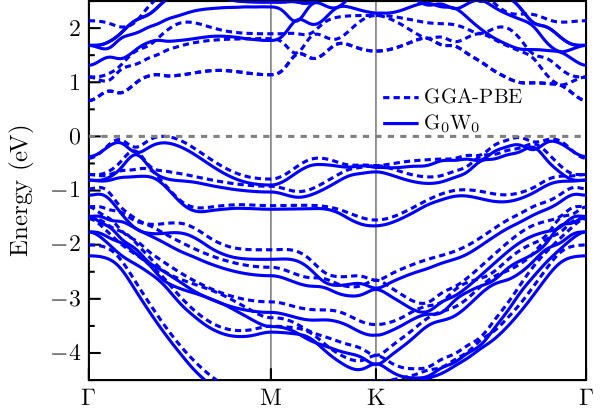

In [3]:
push!(PGFPlotsX.CUSTOM_PREAMBLE, raw"\pgfplotsset{compat=newest}")
push!(PGFPlotsX.CUSTOM_PREAMBLE, raw"\usepgfplotslibrary{colormaps}")
push!(PGFPlotsX.CUSTOM_PREAMBLE, raw"\usepgfplotslibrary{colorbrewer}")
push!(PGFPlotsX.CUSTOM_PREAMBLE,raw"\usetikzlibrary{plotmarks}")

data0=np.loadtxt("../YAMBO/count-1/G0W0/g0w0-bands-out/o-g0w0_bands_7_run.bands_interpolated_01")
data1=np.loadtxt("../YAMBO/count-1/G0W0/g0w0-bands-out/o-g0w0_bands_7_run.bands_interpolated_02")
xx =np.arange(0,238);

tax = @pgf TikzPicture({ })
p = @pgf  Axis(
    { 
        "width=10.0cm", "height=8.0cm",
        "major tick length = 2mm",
        "minor tick length = 1mm",
        "minor y tick num=1",
        "ylabel style={scale=1.2}",
        "xlabel style={scale=1.2}",
        "every axis/.append style={tick style = {line width=1pt,black}, ticklabel style={scale=1.15}}",
        "every axis plot/.style={smooth,no marks,line width=1.5pt}",
        "axis line style={line width=1pt,line cap=round}",
        "xtick pos=left",
        "ytick pos=left",
        xmin=0,xmax=data0[:,1][end],
        ymin=-4.5,ymax=2.5,
        xticklabels = "{\$\\Gamma\$,M,K,\$\\Gamma\$}",
        "xtick={0.0, 0.44530092, 0.702346955, 1.21643903}",
         xmajorgrids,
        "major x grid style={gray,thick}",
        ylabel = "Energy (eV)",
        "ytick distance=1",
        "legend style={
                cells={anchor=west},
                inner xsep=3pt,
                inner ysep=1pt,
                nodes={scale=1.0},
                draw=none,
                fill=none,
                at={(axis cs:0.7,0.48)},
                anchor=west
}",
    },
[Plot({"blue,densely dashed,forget plot"},Table("x"=>data0[:,1],"y"=>data0[:,i])) for i in 2:15],
Plot({"blue,densely dashed"},Table("x"=>data0[:,1],"y"=>data0[:,12])),
LegendEntry("GGA-PBE"),
[Plot({"blue,forget plot"},Table("x"=>data0[:,1],"y"=>data1[:,i])) for i in 2:15],
Plot({"blue"},Table("x"=>data0[:,1],"y"=>data1[:,14])),
LegendEntry(L"\mathrm{G_{0}W_{0}}"),
Plot({"color=gray,dashed"},Coordinates([0,data0[:,1][end]],[0,0]))
)
push!(tax,p)
display("image/png", p)
pgfsave("../Manuscript_images/fig-2.pdf",p)
